  **Intensity Transformations: Introduction**

In [3]:
#import cv2 as cv
#import numpy as np
#f = cv.imread('D:\semester 5\EN3160\images\iman.jpg',cv.IMREAD_GRAYSCALE)
#t = np.arange(256, dtype=np.uint8)
#g = t[f]

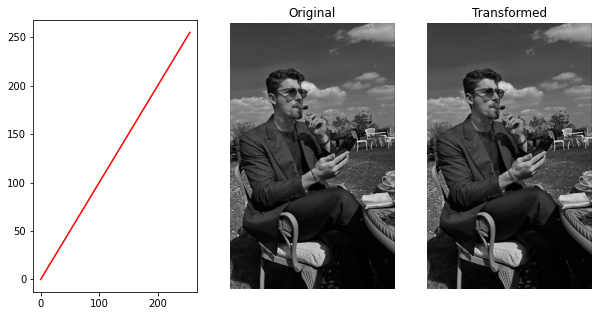

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('D:\semester 5\EN3160\images\iman.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(256, dtype=np.uint8)
#g = t[f]
g = cv.LUT(f, t)  #same as above , t is a lookup table

fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].plot(t, 'r', label='Transformation')
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(t[f], cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

**Negative Transformation** 
<br>
g(x) = 255 - f(x)

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('D:\semester 5\EN3160\images\iman.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(255, -1, -1, dtype=np.uint8)
g = cv.LUT(f, t)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', f)
cv.waitKey(0)
cv.imshow('Image', g)
cv.waitKey(0)
cv.destroyAllWindows()

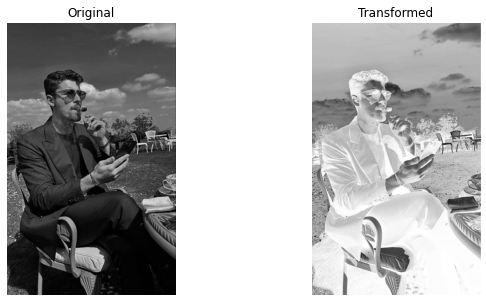

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('D:\semester 5\EN3160\images\iman.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t = np.arange(255, -1, -1, dtype=np.uint8)
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(t[f], cmap='gray')
ax[1].set_title('Transformed')
ax[1].axis('off')
plt.show()

256


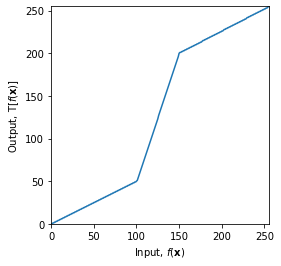

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50), (150,200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

img_orig = cv.imread('D:\semester 5\EN3160\images\iman.jpg  ', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

**Gamma Correction**
<br>
<br>
Values of gamma such that 0 < gamma < 1 map a narrow range of dark pixels to a wider range of dark pixels. (enhance the dark areas of an image)
<br>
gamma = 1 gives the identity transform.
<br>
gamma > 1 enhance the brighter areas


In [ ]:
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
g = cv.LUT(f,t)

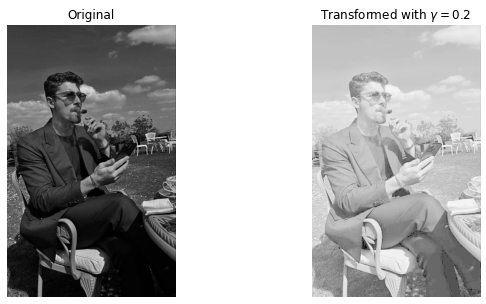

In [11]:
#gamma correction

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('D:\semester 5\EN3160\images\iman.jpg ', cv.IMREAD_GRAYSCALE)
assert f is not None

gamma = 0.2
t = np.array([(i/255.0)**gamma*255 for i in range(256)], dtype=np.uint8)
g = cv.LUT(f,t)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(f, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray')
#Set title with gamma value

ax[1].set_title('Transformed with $\gamma = {0} $'.format(gamma))
ax[1].axis('off')
plt.show()

**Histograms**
<br>
<br>
1. We can represent the intensity distribution over the range of intensities [0, 255], using a histogram.
<br>
2. If *h* is the histogram of a particular image, *h*(r<sub>k</sub>) gives us how many pixels have the intensity *r*<sub>k</sub>.
<br>
3. The histogram of a digital image with gray values in the range [0,L-1] is a discrete function h(r<sub>k</sub>) = n<sub>k</sub> where r<sub>k</sub> is the kth gray level and n<sub>k</sub> is the number of pixels having gray level *r*<sub>k</sub>.
<br>
4. We can normalize the histogram by dividing by the total number of pixels n. Then we have an estimate of the probability of occurrence of level r<sub>k</sub> , i.e. , *p*(r<sub>k</sub>) = *n*<sub>k</sub>/n.
<br>
5. The histogram that we described above had *L* bins. we can construct a coarser histogram by selecting a smaller number of bins than *L*. Then several adjacent values of *k* will be counted for a bin.

**Image Properties though the Histogram**
<br>
<br>
1. If the image is dark, histogram will have many values in the left region, that correspond to dark pixels.
<br>
2. If the image is bright, histogram will have many values in the right region, that correspond to bright pixels.
<br>
3. If a significant number of pixels are dark and a signifiacant number of pixels are bright, the histogram will have two modes, one in the left region and the other in the right region.
<br>
4. A flat histogram signifies that the image has a uniform distribution of all intensities. Then, the contrast is high, and image will look vibrant.

**Histogram Equalization Using OpenCV**

(-0.5, 741.5, 1199.5, -0.5)

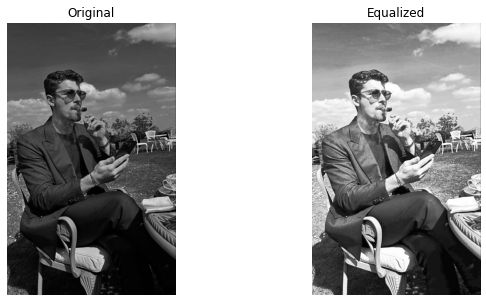

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('D:\semester 5\EN3160\images\iman.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

g = cv.equalizeHist(f)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized')
ax[1].axis('off')



(-0.5, 741.5, 1199.5, -0.5)

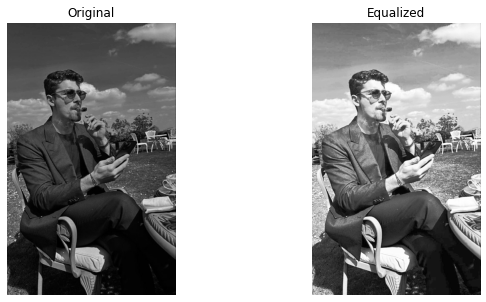

In [4]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('D:\semester 5\EN3160\images\iman.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

#g = cv.equalizeHist(f)
#Handwritten version of equalizeHist function

M, N = f.shape

h = cv.calcHist([f], [0], None, [256], [0,256])
cdf = np.cumsum(h)
L = 256
t = np.uint8((L-1)*cdf / (M*N))
g = t[f]


fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized')
ax[1].axis('off')



**Spatial Filtering**
<br>
<br>
* We use spatial filtering to enhance images.
<br>
* We can use the same technique to locate objects in images, called template matching, we would be able to process images using filters, as done in popular image processing software such as photoshop.
<br>
* Intensity transformations affect the brightness (intensity level) of an image. The resulting value of a pixel after an intensity operation is just dependent on the original value of the same pixel.
* In contrast , the resulting value of a pixel after a spatial filtering operation depends on the neighborhood of the pixel in question. So the space around the pixel in question matters, hence , the name spatial filtering.
* In linear spatial filtering we use the 2-D convolution operation.

**Averaging Using cv.filter2D**

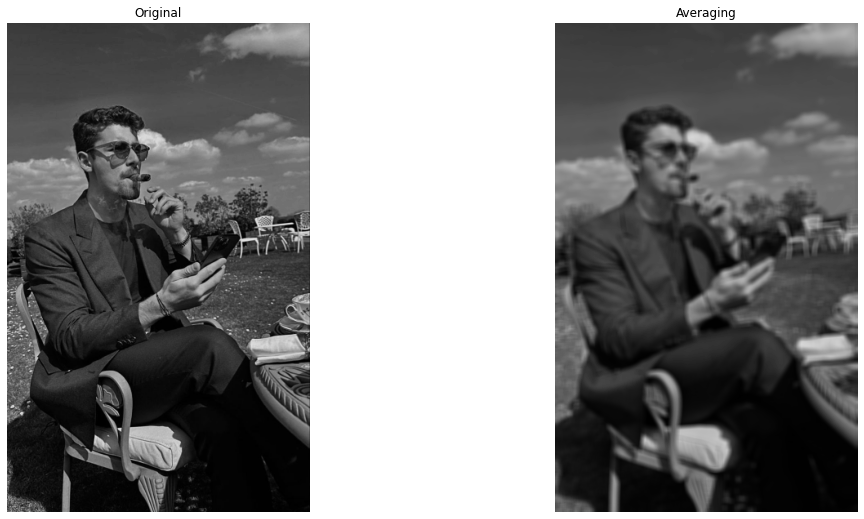

In [7]:
#Average filtering

import cv2 as cv
import numpy as np
from matplotlib import pyplot as pyplot

im = cv.imread('D:\semester 5\EN3160\images\iman.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

k_s = 7
kernal = np.ones((k_s,k_s),np.float32)/(k_s*k_s)
imavg = cv.filter2D(im, cv.CV_32F, kernal)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
axes[0].imshow(im, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(imavg, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Averaging')
axes[1].axis('off')
plt.show()

**Sobel Filtering Using cv.filter2D**

(-0.5, 370.5, 599.5, -0.5)

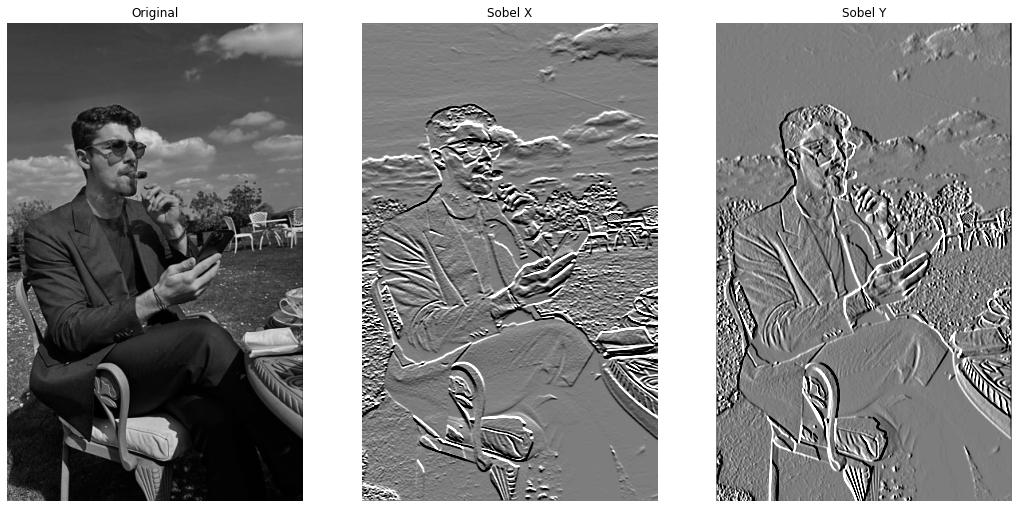

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('D:\semester 5\EN3160\images\iman.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_32F, sobel_x)
im_y = cv.filter2D(im, cv.CV_32F, sobel_y)

#CV_32F output to be 32 bit floating point numbers

fig, ax = plt.subplots(1,3, figsize=(18,9))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(im_x+125, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel X')
ax[1].axis('off')
#ax[0].set_xticks([]), ax[0].set_yticks([])
ax[2].imshow(im_y+125, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sobel Y')
ax[2].axis('off')
#ax[1].set_xticks([]), ax[1].set_yticks([])

#display part - research more


**Convolution and Correlation**
<br>
<br>
* Spatial filtering is, in fact, convolution.
<br>
* As the filters are typically symmetric - i.e., a 180 degree rotation results in the same kernal-correlation is equivalent to convolution.
<br>
* Correlation is also the scalar product between the kernal and the underlying image patch.Therefore, it is a measure of similarity between the kernel and the underlying image patch.
<br>
* As a result, when the kernal and the patch are "simlar", the output is high.In view of this, spatial filtering seeks for patches in the image that are similar to the kernel.
<br>
* Implementing filtering using loops (four nested for loops) in a non-C fashion is inefficient . Instead, use filter2D.
<br>
* When kernel overlying on an image patch basically what happens is a vector dot product.